# Author : Pradip Kumar Murmu
## Task 1: Predication using Supervised ML (Level - Beginner)
## GRIP @ The Sparks Foundation

In this regression task I tried to predict the percentage of marks that a student is expected to score based the number of hours they studied. 

This is a simple linear regression task as it involves just two variables.

## Technical Stack : Numpy Array, Pandas, Matplotlib, Scikit Learn


In [94]:
# Import important libraries
import numpy as np #Linear Algebra
import pandas as pd # Data preprocessing

%matplotlib inline
import matplotlib.pyplot as plt # Visualize the data
import seaborn as sns
 
from sklearn.model_selection import train_test_split # to split the dataset into train and test set
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.metrics import mean_squared_error # Mean Squared Error
from sklearn.metrics import mean_absolute_error # Mean Absolute Error
from sklearn.metrics import r2_score #R^2 squared score or Coefficient of Determination

# Step 1 - Reading the data from source

In [12]:
# load the data given url, 'http://bit.ly/w-data'
url = 'http://bit.ly/w-data' 
data = pd.read_csv(url) 
print('Data Load successfully!')


Data Load successfully!


# Step 2 - Exploratory Data Analysis

In [14]:
#  Display first 10 rows of dataset
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
data.shape

(25, 2)

* Dataset comprises of 25 observations and 12 columns.
* Out of which one is dependent varible and one is independent variable.


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* Data has only float and integer values
* No variable column has null/ missing values

In [96]:
# data summary
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The correlation value between hours and scores variable is 0.9761906560220888


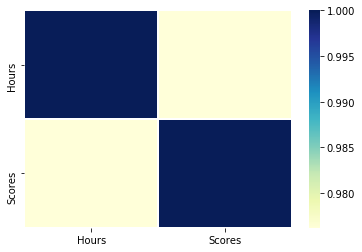

In [40]:
data_corr = data.corr()
print('The correlation value between hours and scores variable is {}'.format(data_corr.iloc[0,1]))
ax = sns.heatmap(data_corr, 
                 cmap='YlGnBu',
                linewidths = 0.5)

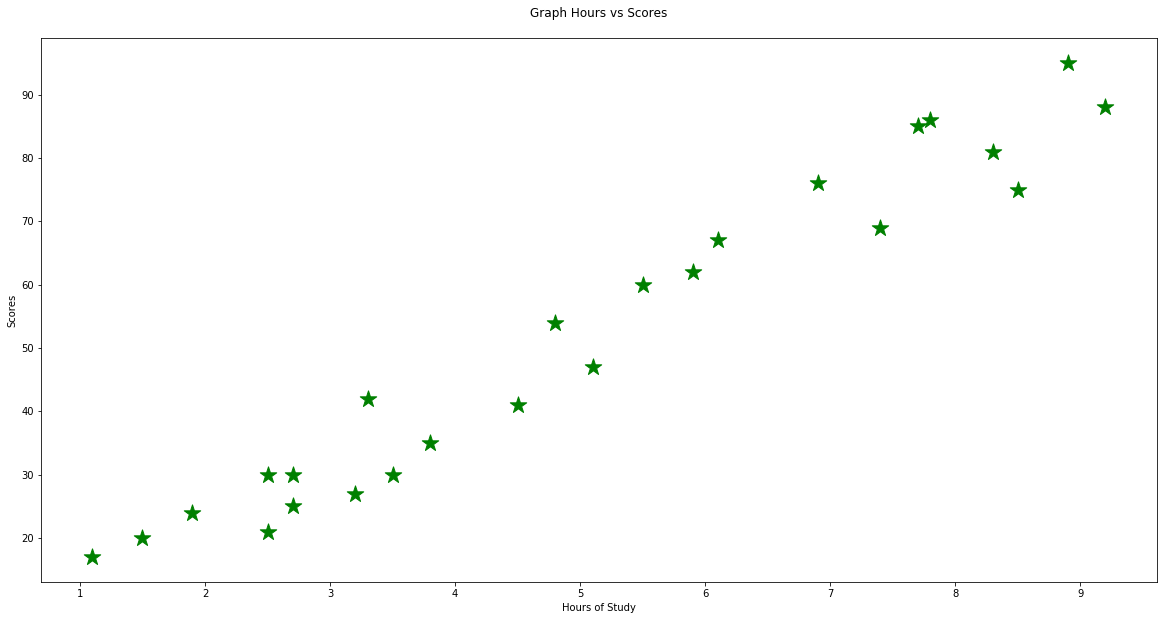

In [35]:
# Data Visualization 
plt.figure(figsize=(20,10))
plt.scatter(data['Hours'], 
            data['Scores'], 
            marker='*',
            color='g',
            cmap='YlGnBu', 
           s = 300)
plt.title('Graph Hours vs Scores\n')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.show()

From the graph and heatmap we can safely say that a positive linear relation between the number of hours studied and percentage of score.

# Step 3 - Data preprocessing
This step involved division of data into 'features' (inputs) and 'labels' (outputs)

In [74]:
X = data.iloc[:,0].values
Y = data.iloc[:,1].values

# Step 4 - Model Training
Splitting the data into training and testing sets and  training the algorithm.

In [84]:
#Splitting the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state = 0)

In [85]:
# Display the x_train, y_train, x_train, x_test
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[3.8 1.9 7.8 6.9 1.1 5.1 7.7 3.3 8.3 9.2 6.1 3.5 2.7 5.5 2.7 8.5 2.5 4.8
 8.9 4.5]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[1.5 3.2 7.4 2.5 5.9]
[20 27 69 30 62]


In [97]:
# Create the Linear Regression model and training the model with train datasets
lr = LinearRegression()
lr.fit(x_train.reshape(-1,1),y_train) 
print('Training Complete.')


Training Complete.


# Step 5 - Plotting the line of regression
Now since our model is trained now, its the time to visualize the best-fit line of regression

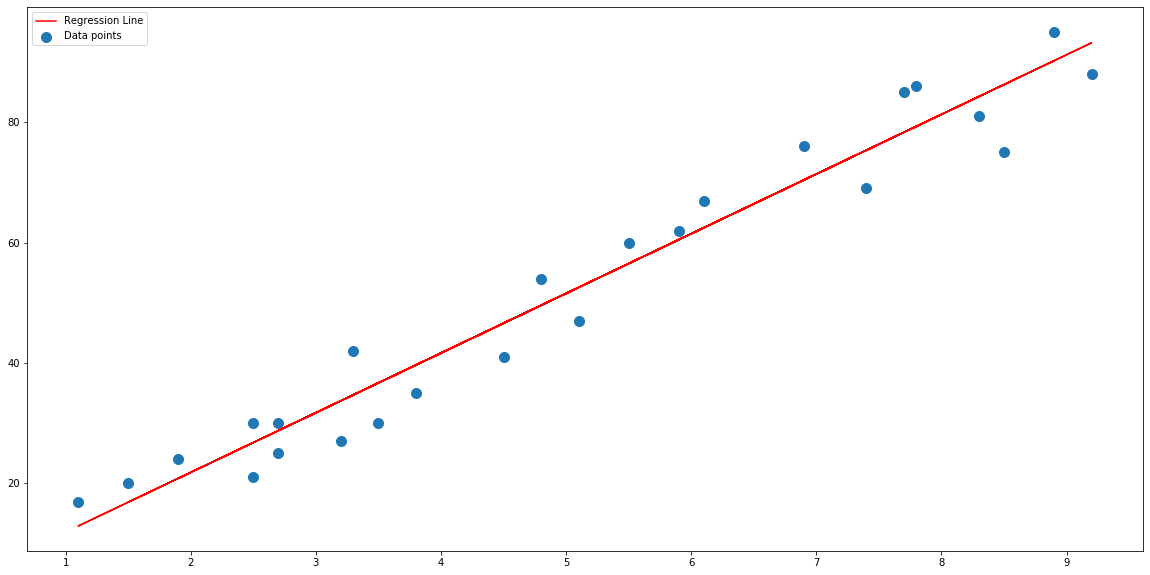

In [87]:
# Plotting the regression line
line = lr.coef_ * X + lr.intercept_
plt.figure(figsize=(20,10))
plt.scatter(X,Y, s = 100, label='Data points') # Plotting for the test data
plt.plot(X,line, color ='r', label='Regression Line')
plt.legend()
plt.show()

# Step 6 - Making Predictions
Now that we have triande our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [88]:
# Print the x_test dataset
print(x_test)

#predict the test dataset using Linear Regression model
y_pred = lr.predict(x_test.reshape(-1,1))

[1.5 3.2 7.4 2.5 5.9]


# Step 7 - Comparing Actual result to the Predicted Model result

In [89]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':y_test,
                  'Predicted':y_pred})
df.head()

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [90]:
#Estimating training and test score
print('Training Score: ', lr.score(x_train.reshape(-1,1),y_train))
print('Test Score: ', lr.score(x_test.reshape(-1,1), y_test))

Training Score:  0.9515510725211553
Test Score:  0.9454906892105356


In [91]:
#Estimating Training and Test Score
print('Training Score: {}'.format(lr.score(x_train.reshape(-1,1),y_train)))
print('Test Score: {}'.format(lr.score(x_test.reshape(-1,1),y_test)))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105356


In [92]:
# Predict the score of the given hour 9.25 in the problem statement

hour = 9.25
test = np.array([hour])
test = test.reshape(-1,1)
pred_score = lr.predict(test)
print('No of hours = {}'.format(hour))
print('Predicted Score = {}'.format(pred_score[0]))

No of hours = 9.25
Predicted Score = 93.69173248737538


# Step - 8 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy

In [95]:
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('R^2 Score: {}'.format(r2_score(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R^2 Score: 0.9454906892105356


R^2 gives the score of, how good the model is fit? and in this case we r^2 = 0.9454906892105356 which is pretty close to 1. Great score for this model.   

# Conclusion

### I was successfully able to carry-out prediction using supervised ML task and was able to evaluate the model's performance or various parameters.

# Thank You